In [4]:
# data
import pandas as pd
import numpy as np


# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
# import plotly.graph_objects as go

## Using msno Library for Missing Value analysis:
import missingno as msno

# styling
%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'

In [5]:
## For preprocessing
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from imblearn.pipeline import Pipeline

## for model training
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [6]:
#Read data
data_original =  pd.read_csv("credit_risk_dataset.csv") 
data = pd.read_csv("credit_risk_dataset.csv") 

# Print sample
data.sample(15).reset_index(drop=True)

person_age  person_income person_home_ownership  person_emp_length  \
0           26          63180                   OWN                4.0   
1           27         200000              MORTGAGE                6.0   
2           24          19200                  RENT                2.0   
3           22          65004              MORTGAGE                6.0   
4           23          29000                  RENT                0.0   
5           23          38000                  RENT                0.0   
6           24          85000              MORTGAGE                2.0   
7           23          78000              MORTGAGE                0.0   
8           24         120000              MORTGAGE                8.0   
9           22          65000                   OWN                6.0   
10          25         125000                  RENT                0.0   
11          23         144000              MORTGAGE                7.0   
12          25         110000              MORTGAGE                2.0   
13          37          80000              MORTGAGE                8.0   
14          34          74000                  RENT                3.0   

          loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0     HOMEIMPROVEMENT          C       5825          13.43            0   
1           EDUCATION          A       5000           7.74            0   
2           EDUCATION          B       1000          12.53            0   
3             MEDICAL          B       6500           9.25            0   
4             VENTURE          F       8000          18.30            1   
5             MEDICAL          A       8000           6.17            0   
6   DEBTCONSOLIDATION          B       7000          12.69            0   
7             MEDICAL          A      10000           6.62            0   
8   DEBTCONSOLIDATION          C       8400          13.72            0   
9             VENTURE          B       7000          11.49            0   
10            VENTURE          A      15000            NaN            0   
11           PERSONAL          A      10000           5.99            0   
12    HOMEIMPROVEMENT          A      15000           7.88            0   
13  DEBTCONSOLIDATION          A      13000           6.62            0   
14          EDUCATION          C      11200          11.66            1   

    loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                  0.09                         Y                           2  
1                  0.03                         N                           7  
2                  0.05                         N                           4  
3                  0.10                         N                           4  
4                  0.28                         N                           2  
5                  0.21                         N                           2  
6                  0.08                         N                           3  
7                  0.13                         N                           2  
8                  0.07                         Y                           2  
9                  0.11                         N                           4  
10                 0.12                         N                           3  
11                 0.07                         N                           2  
12                 0.14                         N                           2  
13                 0.16                         N                          16  
14                 0.15                         N                          10

In [7]:
df = data.copy()
df.shape

(32581, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [9]:
df.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [10]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

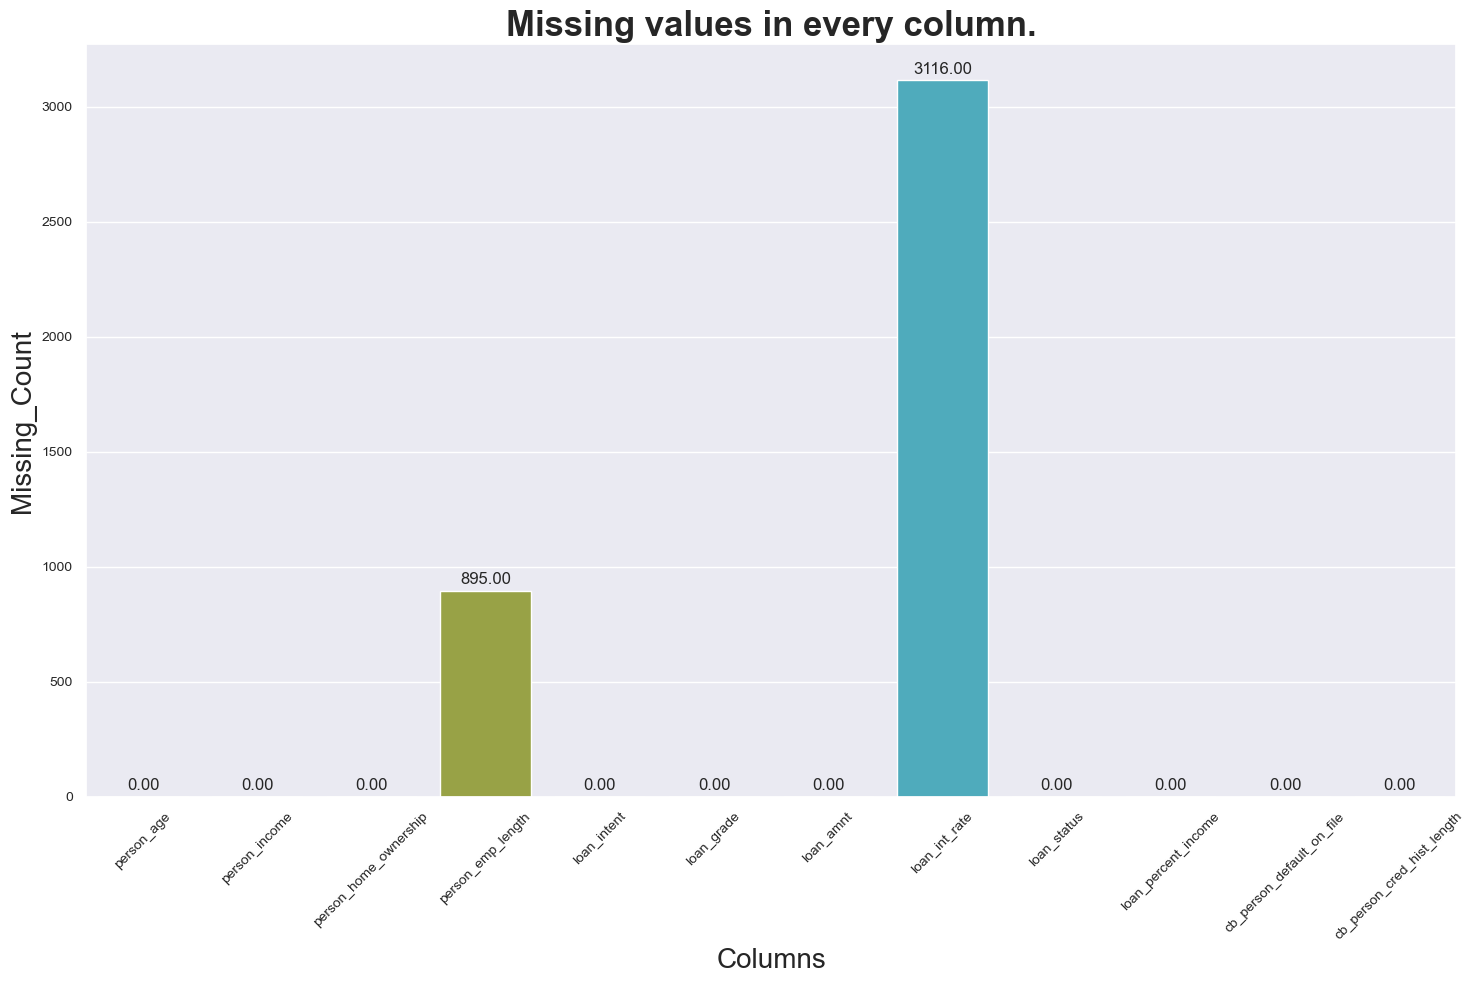

In [11]:
mn=df.isna().sum()
mn=pd.DataFrame(mn,columns=["missing_count"]).reset_index()
mn.columns=["columns_names","missing_count"]

sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,10))
plots=sns.barplot(x=mn.columns_names,y=mn.missing_count)
# Iterating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=45) #Rotating the Label
plt.title("Missing values in every column.",size=25,weight="bold") #Title of the plot
plt.xlabel("Columns",fontsize=20) #Title of x-axis
plt.ylabel("Missing_Count",fontsize=20)
plt.tick_params(labelsize=10) #Varying label size
plt.tight_layout()

### Using missing number visualiser to review the missing data:


<Axes: >

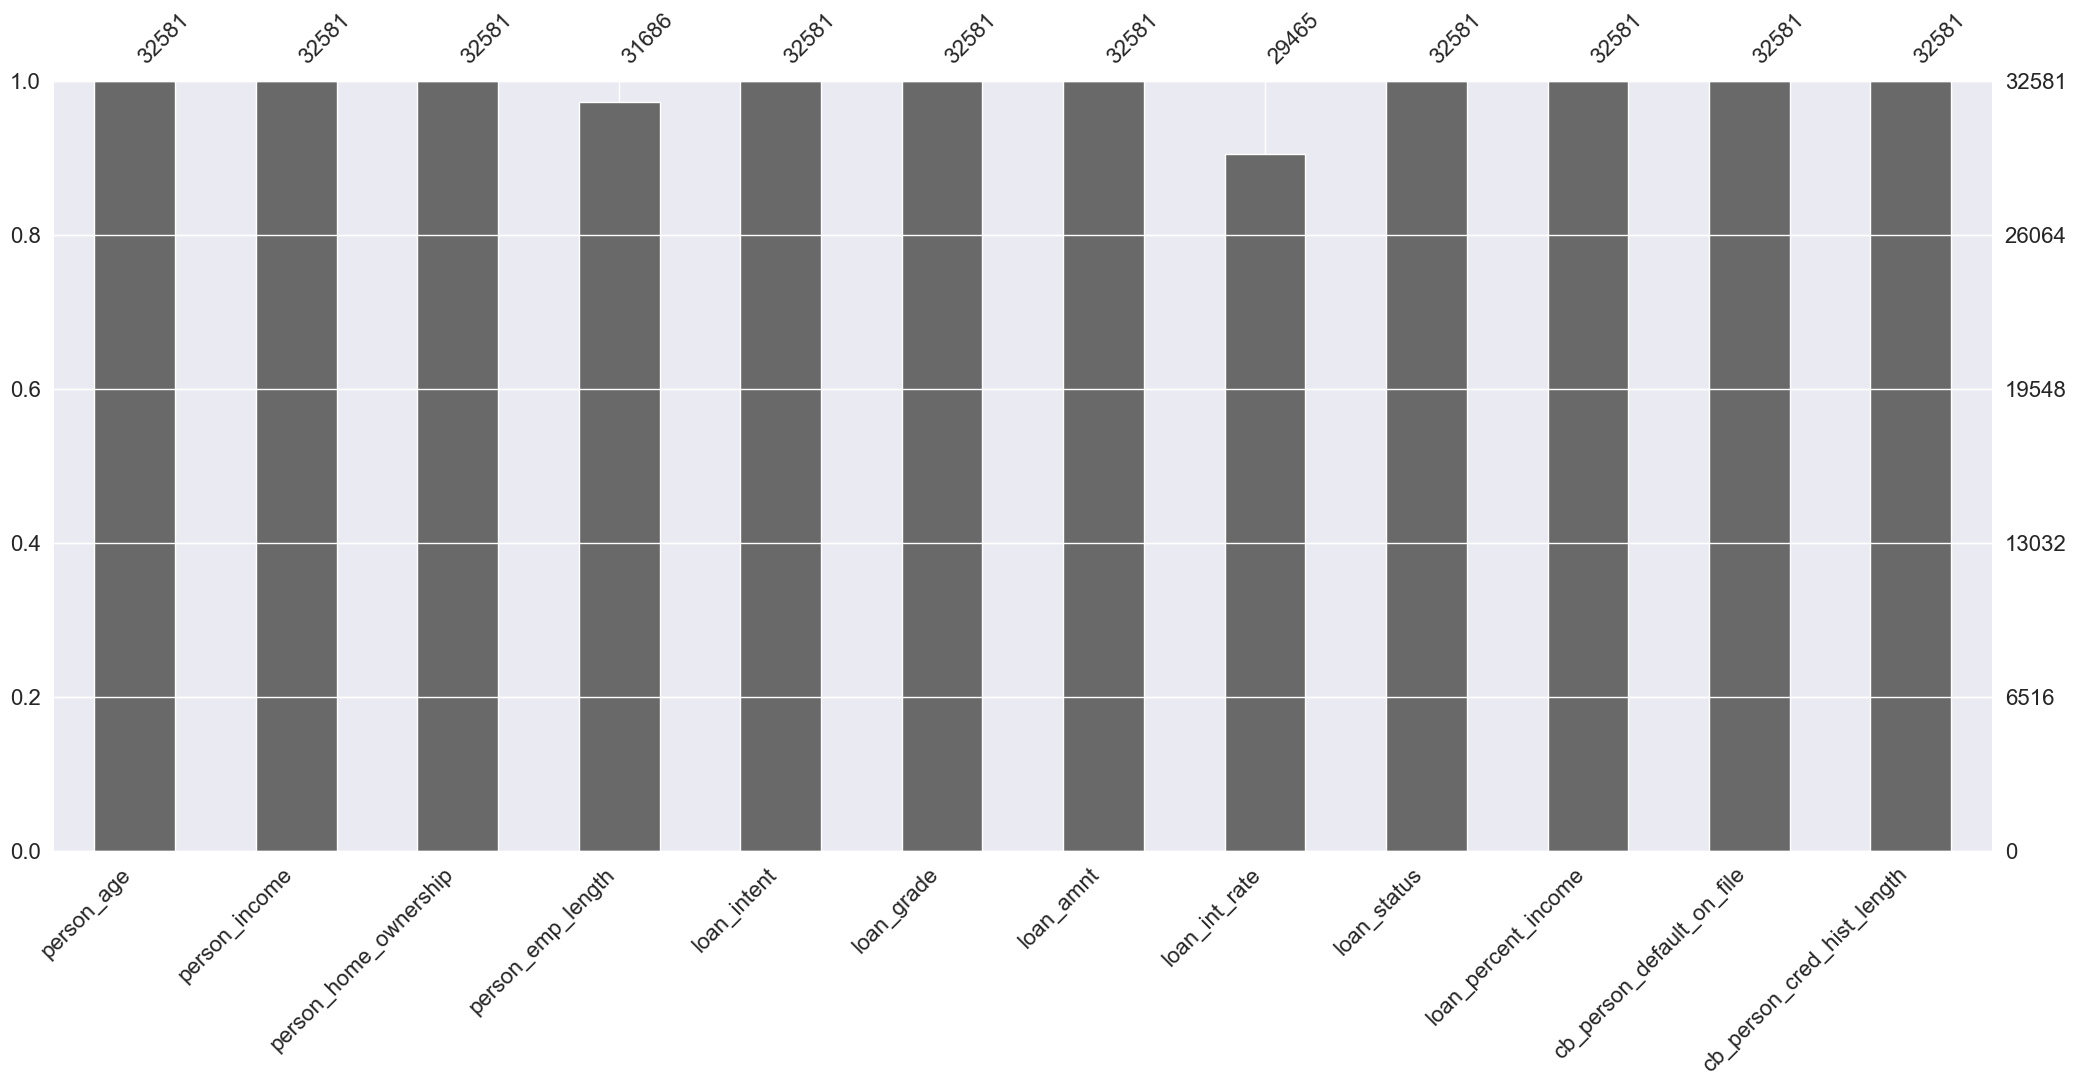

In [12]:
msno.bar(df)


**On the **left** side of the plot, the y-axis scale ranges from 0.0 to 1.0, where 1.0 represents 100% data completeness. If the bar is less than this, it indicates that we have missing values within that column.** 

**On the **right** side of the plot, the scale is measured in index values. With the top right representing the maximum number of rows within the dataframe.** 

**Along the **top** of the plot, there are a series of numbers that represent the total count of the non-null values within that column.**

<Axes: >

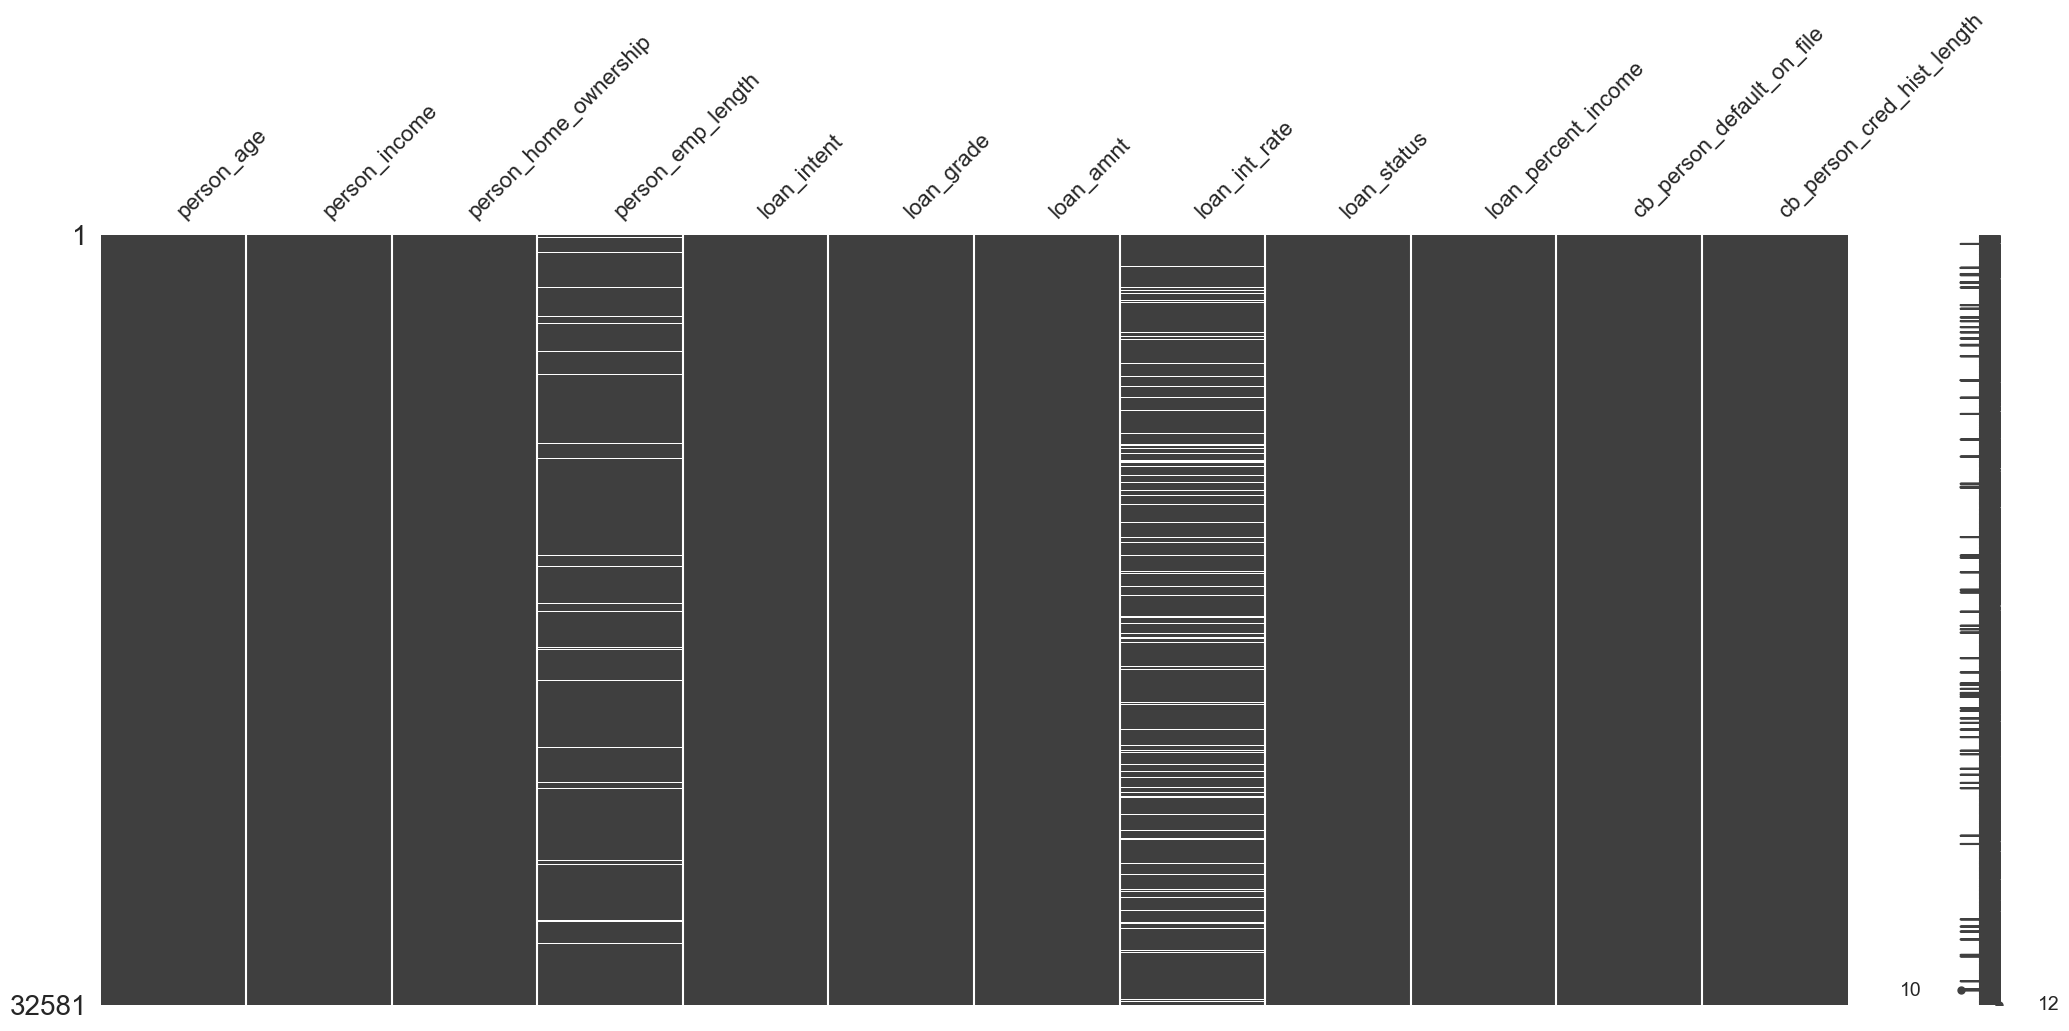

In [13]:
msno.matrix(df)

**The matrix plot is a great tool if you are working with depth-related data or time-series data.** \
**It provides a colour fill for each column When data is present, the plot is shaded in grey (or your colour of choice), and when it is absent the plot is displayed in white.**

In [14]:
### rows which have null values
df[(df.person_emp_length.isnull() | df.loan_int_rate.isnull())]

person_age  person_income person_home_ownership  person_emp_length  \
39             23          71500                  RENT                3.0   
50             24          78000                  RENT                4.0   
57             23         277000                   OWN                3.0   
59             24          12000                   OWN                2.0   
62             26         263000              MORTGAGE                0.0   
...           ...            ...                   ...                ...   
32547          53           4888                   OWN                0.0   
32552          65          45900                  RENT                2.0   
32553          54          20000                  RENT                2.0   
32569          51          60000              MORTGAGE                1.0   
32570          58          72000                  RENT                5.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
39     DEBTCONSOLIDATION          D      30000            NaN            1   
50     DEBTCONSOLIDATION          D      30000            NaN            1   
57              PERSONAL          A      35000            NaN            0   
59               VENTURE          E       1750            NaN            0   
62             EDUCATION          B      10000            NaN            1   
...                  ...        ...        ...            ...          ...   
32547            VENTURE          C       1400            NaN            1   
32552          EDUCATION          C      10000            NaN            0   
32553            MEDICAL          C       5000            NaN            0   
32569           PERSONAL          A       7500            NaN            0   
32570    HOMEIMPROVEMENT          B       4500            NaN            0   

       loan_percent_income cb_person_default_on_file  \
39                    0.42                         N   
50                    0.38                         Y   
57                    0.13                         N   
59                    0.15                         Y   
62                    0.04                         N   
...                    ...                       ...   
32547                 0.29                         Y   
32552                 0.22                         Y   
32553                 0.25                         N   
32569                 0.13                         N   
32570                 0.06                         N   

       cb_person_cred_hist_length  
39                              4  
50                              4  
57                              4  
59                              3  
62                              4  
...                           ...  
32547                          28  
32552                          19  
32553                          28  
32569                          23  
32570                          23  

[3943 rows x 12 columns]

#### 67 rows are same occuring in both filed loan_int_rate & person_imp_length
#### Total 3943 rows containes null values which we will removed
#### 3943 from 32581 which means 12.02% data have null values, which is minor so we will drop this rows.

In [15]:
(3915*100)/df.shape[0]

12.016205764095638

In [16]:
### drop null values
df.dropna(inplace=True)

In [17]:
print("Duplicated Values: ", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Shape after remove duplicated values: ", df.shape)

Duplicated Values:  137
Shape after remove duplicated values:  (28501, 12)


### working on Data types

In [18]:
ccol=df.select_dtypes(include=["object"]).columns
ncol=df.select_dtypes(include=["int","float"]).columns

print("The number of Categorical columns are:",len(ccol))
print("The number of Numerical columns are:",len(ncol))

The number of Categorical columns are: 4
The number of Numerical columns are: 8


##### Printing the different columns with their cardinality (number of unique elements in each column):

In [19]:
print("The NUMERICAL columns are:\n")
for i in ncol:
    print(f"-> {i} - {df[i].nunique()}")
    
print("\n---------------------------\n")
print("The CATEGORICAL columns are:\n")
for i in ccol:
    print(f"-> {i} - {df[i].nunique()}")

The NUMERICAL columns are:

-> person_age - 57
-> person_income - 3835
-> person_emp_length - 36
-> loan_amnt - 728
-> loan_int_rate - 348
-> loan_status - 2
-> loan_percent_income - 77
-> cb_person_cred_hist_length - 29

---------------------------

The CATEGORICAL columns are:

-> person_home_ownership - 4
-> loan_intent - 6
-> loan_grade - 7
-> cb_person_default_on_file - 2


##### **'loan_int_rate' describes the Interest Rate offered on Loans by Banks or any financial institution. There is no fixed value as it varies from bank to bank. Hence we are removing this column for our analysis.**

In [20]:
df.drop(['loan_int_rate'],axis=1,inplace=True)

## EDA

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15680\464417205.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmax =.8, square = True, annot = True,cmap='Greens' )


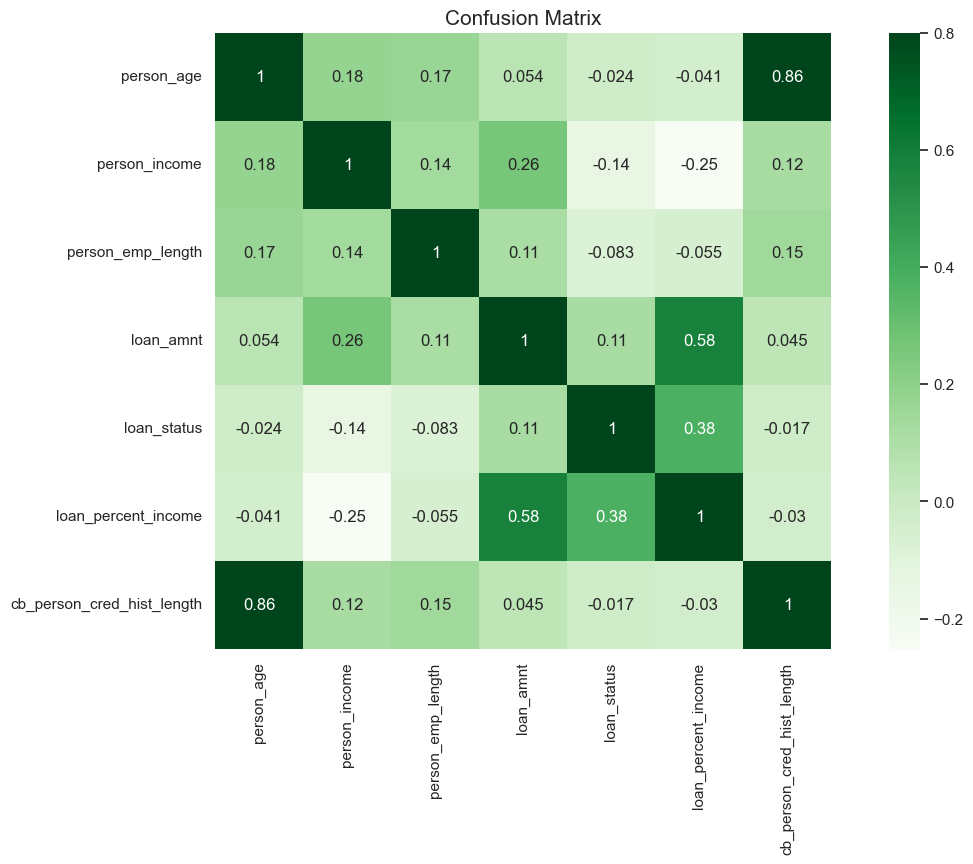

In [21]:
fig, ax = plt.subplots() 
fig.set_size_inches(15,8)
sns.heatmap(df.corr(), vmax =.8, square = True, annot = True,cmap='Greens' )
plt.title('Confusion Matrix',fontsize=15);

## Univariate Analysis 

In [22]:
#MAX AND MIN AGE
max_ = df['person_age'].max()
min_ = df['person_age'].min()
print(f"maximum Age {max_}")
print(f"minimum Age {min_}")

age_dic = {}
# people with an age between x and y
def age_group(arr):
    for i in range(0, len(arr)-1):
        next = arr[i]+1
        num_people = df['person_age'].between(next,arr[i+1]).sum()
        print(f'Age between {next} and {arr[i+1]}: Number of people {num_people}')
        age_between_var = f"{next}_{arr[i+1]}"
        age_dic[age_between_var] = num_people
        
age_group([0 ,18, 26, 36, 46, 56, 66])

fig=px.bar(x=age_dic.keys(),y=age_dic.values(),text_auto=True, template = 'presentation', title = 'Age Groupwise Count',color_discrete_sequence=px.colors.sequential.Blues_r)
fig.update_layout(xaxis_title="Age Group", yaxis_title="Number of People")
fig.show()

maximum Age 144
minimum Age 20
Age between 1 and 18: Number of people 0
Age between 19 and 26: Number of people 15579
Age between 27 and 36: Number of people 10392
Age between 37 and 46: Number of people 2051
Age between 47 and 56: Number of people 371
Age between 57 and 66: Number of people 87


In [23]:
#max and min income
max_ = df['person_income'].max()
min_ = df['person_income'].min()

print(f"maximum Income {max_}")
print(f"minimum Income {min_}")

income_dic = {}
#people with an income between x and y
def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df['person_income'].between(next,arr[i+1]).sum()
        print(f'Income between {next} and {arr[i+1]}: Number of people {num_people}')
        income_between_var = f"{next}_{arr[i+1]}"
        income_dic[income_between_var] = num_people
        
income_group([0, 25000, 50000, 75000, 100000,float('inf')])

fig=px.bar(x=income_dic.keys(),y=income_dic.values(), text_auto=True, template = 'presentation', title = 'Income Groupwise Count',color_discrete_sequence=px.colors.sequential.Blues_r)
fig.update_layout(xaxis_title="Income Group", yaxis_title="Number of People")
fig.show()

maximum Income 6000000
minimum Income 4000
Income between 1 and 25000: Number of people 1960
Income between 25001 and 50000: Number of people 10144
Income between 50001 and 75000: Number of people 8501
Income between 75001 and 100000: Number of people 4174
Income between 100001 and inf: Number of people 3722


In [24]:
#min and max loan amount
max_loan_amount = df['loan_amnt'].max()
min_loan_amount = df['loan_amnt'].min()

print(f"maximum Loan Amount {max_loan_amount}")
print(f"minimum Loan Amount {min_loan_amount}")

loanamount_dic = {}
# people with an income between x and y
def loan_amount_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df['loan_amnt'].between(next,arr[i+1]).sum()
        print(f'Loan Amount between {next} and {arr[i+1]}: Number of people {num_people}')
        loanamount_between_var = f"{next}_{arr[i+1]}"
        loanamount_dic[loanamount_between_var] = num_people
        
loan_amount_group([0, 5000, 10000, 15000, float('inf')])

fig=px.bar(x=loanamount_dic.keys(),y=loanamount_dic.values(),text_auto=True, template = 'presentation', title = 'Loan Amount Groupwise Count',color_discrete_sequence=px.colors.sequential.Blues_r)
fig.update_layout(xaxis_title="Loan Amount Group", yaxis_title="Number of People")
fig.show()

maximum Loan Amount 35000
minimum Loan Amount 500
Loan Amount between 1 and 5000: Number of people 8139
Loan Amount between 5001 and 10000: Number of people 10565
Loan Amount between 10001 and 15000: Number of people 5399
Loan Amount between 15001 and inf: Number of people 4398


In [25]:
level_counts=df.person_home_ownership.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Blues_r,
          title= 'person_home_ownership'
          )

fig.update_traces(textinfo='label+percent+value', textfont_size=13, # By default property label+percent+value
                  marker=dict(line=dict(color='gray', width=0.2))) # set border of PIE Chart

fig.data[0].marker.line.width = 2  #also you can change the border size with that way.
fig.show()

**Observations: Most of the People taking a loan doesnt own their own house**


In [26]:
level_counts=df.loan_grade.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Blues_r, # you can use Mint
          title= 'loan_grade'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

**Observations: Loan Grade A and B comprises of 65.2% of total**
<ul>
    <li>A: The borrower has a high creditworthiness, indicating low risk.</li>
    <li>B: The borrower is relatively low-risk, but not as creditworthy as Grade A.</li>
</ul>

In [27]:
fig=px.histogram(df, x='loan_intent', histnorm = 'percent', text_auto = '.2f', template = 'presentation', title = 'loan intent',color_discrete_sequence=px.colors.sequential.Blues_r)
fig.update_layout()
fig.show()

**Observations:Loan Intent are equally almost distributed**

In [28]:
fig=px.histogram(df, x = 'cb_person_cred_hist_length', text_auto = True,template = 'presentation', title = 'person credit history length',color_discrete_sequence=px.colors.sequential.Blues_r)
fig.update_layout()
fig.show()

## Bivariate Analysis


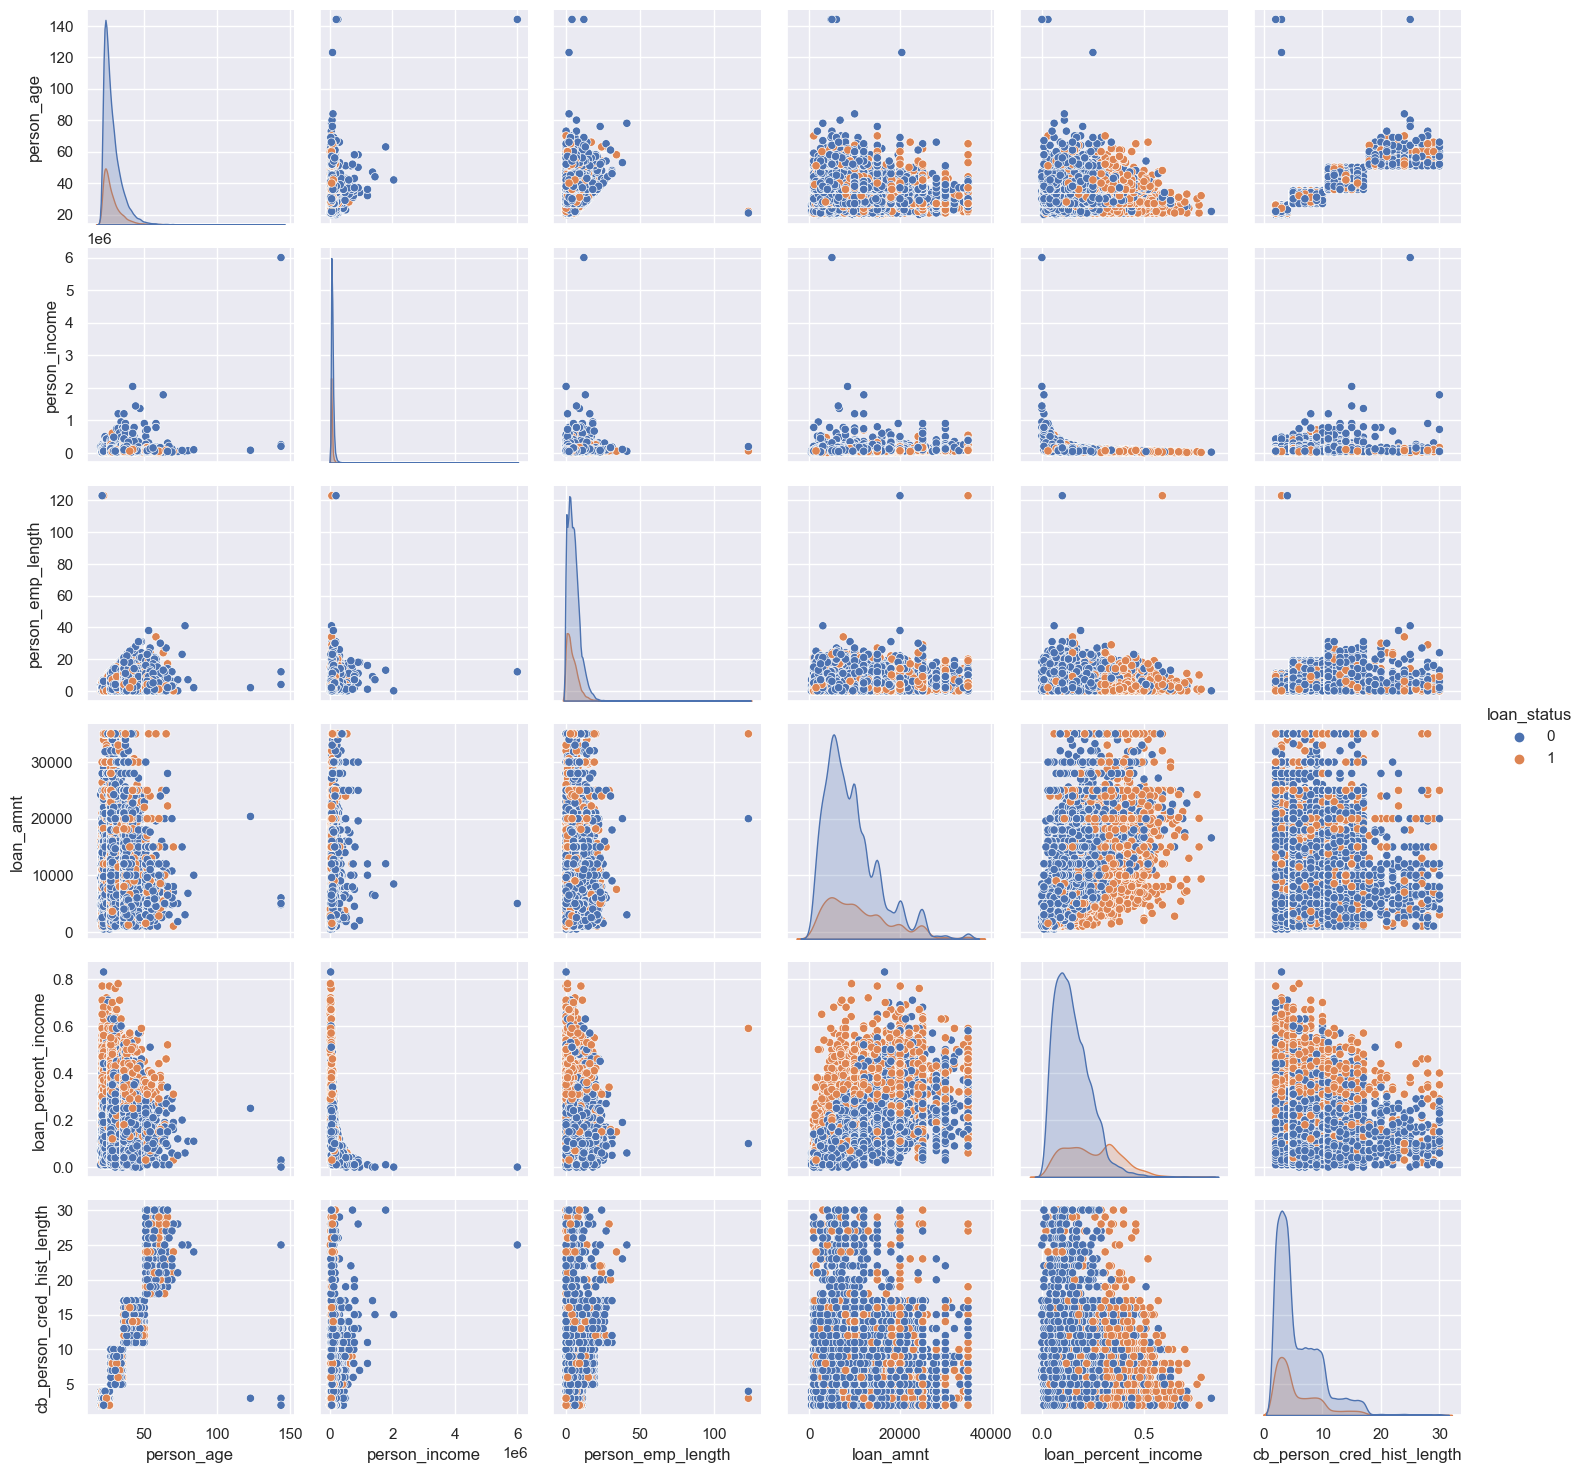

In [26]:
sns.pairplot(df,hue="loan_status")

# <div style="border-radius:0px; border:#0047AB solid; padding: 15px; background-color: lightblue; font-size:100%; text-align:center">5. Dealing with Outliers</div>

In [29]:
df['loan_status'].value_counts()

0    22313
1     6188
Name: loan_status, dtype: int64

**person_age max 144 (issue)** \
**person_emp_length max 123 (issue)**

<BarContainer object of 57 artists>

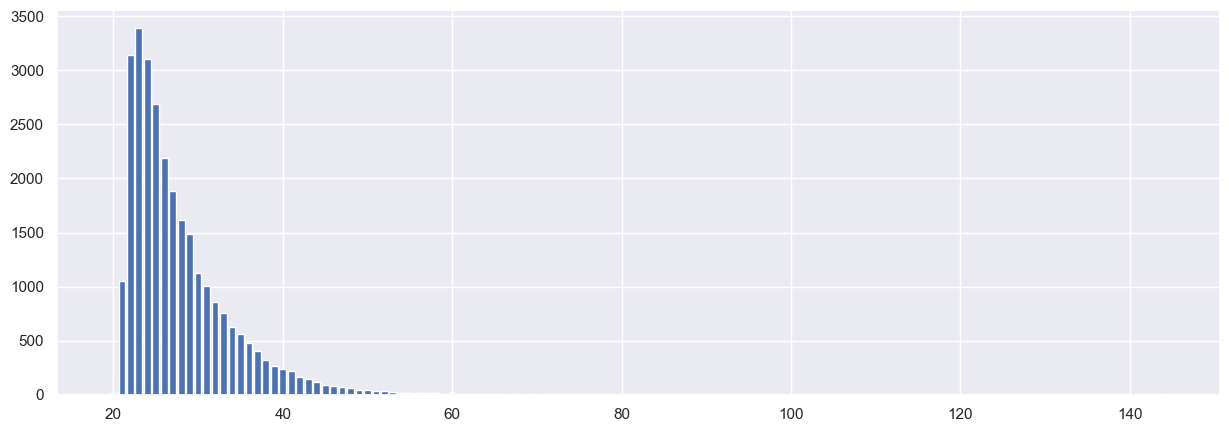

In [30]:
import matplotlib.pyplot as plt 
verti = df['person_age'].value_counts().values
hori = df['person_age'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)
# after 80 it is rare

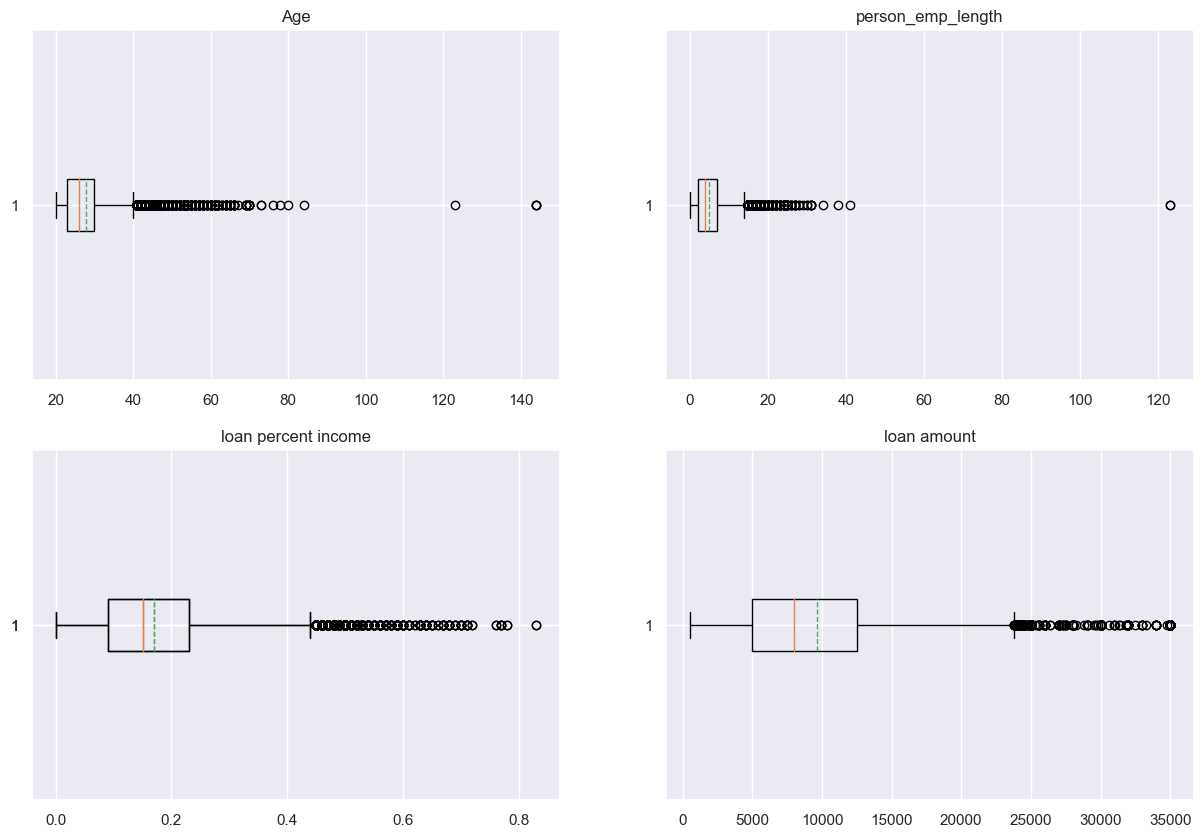

In [31]:
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.boxplot(df['person_age'], vert=False,showmeans=True, meanline=True)
plt.title("Age")

plt.subplot(2,2,2)
plt.boxplot(df['person_emp_length'], vert=False,showmeans=True, meanline=True)
plt.title("person_emp_length")

plt.subplot(2,2,3)
plt.boxplot(df['loan_percent_income'], vert=False,showmeans=True, meanline=True)
plt.title("loan percent income")

plt.subplot(2,2,4)
plt.boxplot(df['loan_amnt'], vert=False,showmeans=True, meanline=True)
plt.title("loan amount")

plt.subplot(2,2,3)
plt.boxplot(df['loan_percent_income'], vert=False,showmeans=True, meanline=True)
plt.title("loan percent income")


plt.show()
# plt.subplot(2,2,1)

#### Remove Outlier from person_age


In [32]:
print("Number of Data points above 80: ", (df['person_age'].value_counts().values>80).sum())

df = df.drop(df[df['person_age'] > 80].index, axis=0) # dropping rows that have age greater than 80
df['person_age'].max()

Number of Data points above 80:  26


80

In [33]:
df

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_status  \
0             PERSONAL          D      35000            1   
1            EDUCATION          B       1000            0   
2              MEDICAL          C       5500            1   
3              MEDICAL          C      35000            1   
4              MEDICAL          C      35000            1   
...                ...        ...        ...          ...   
32576         PERSONAL          C       5800            0   
32577         PERSONAL          A      17625            0   
32578  HOMEIMPROVEMENT          B      35000            1   
32579         PERSONAL          B      15000            0   
32580          MEDICAL          B       6475            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[28496 rows x 11 columns]

#### Remove Outlier from person_emp_length


In [34]:
df['person_emp_length'].max()

123.0

In [35]:
df['person_emp_length'].value_counts()

0.0      3690
2.0      3451
3.0      3121
5.0      2696
1.0      2629
4.0      2559
6.0      2382
7.0      1963
8.0      1525
9.0      1221
11.0      660
10.0      628
12.0      514
13.0      380
14.0      305
15.0      213
16.0      152
17.0      114
18.0       96
19.0       61
20.0       36
21.0       33
22.0       18
23.0       10
24.0        8
25.0        8
27.0        5
26.0        4
31.0        4
28.0        2
123.0       2
30.0        2
41.0        1
34.0        1
29.0        1
38.0        1
Name: person_emp_length, dtype: int64

In [36]:
df[df['person_emp_length']>=42.0]

person_age  person_income person_home_ownership  person_emp_length  \
0            22          59000                  RENT              123.0   
210          21         192000              MORTGAGE              123.0   

    loan_intent loan_grade  loan_amnt  loan_status  loan_percent_income  \
0      PERSONAL          D      35000            1                 0.59   
210     VENTURE          A      20000            0                 0.10   

    cb_person_default_on_file  cb_person_cred_hist_length  
0                           Y                           3  
210                         N                           4

In [37]:
df = df.drop(df[df['person_emp_length'] >= 42.0].index, axis=0) # dropping rows that have age greater than 80
df['person_emp_length'].max()

41.0

In [38]:
df

person_age  person_income person_home_ownership  person_emp_length  \
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
5              21           9900                   OWN                2.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_status  \
1            EDUCATION          B       1000            0   
2              MEDICAL          C       5500            1   
3              MEDICAL          C      35000            1   
4              MEDICAL          C      35000            1   
5              VENTURE          A       2500            1   
...                ...        ...        ...          ...   
32576         PERSONAL          C       5800            0   
32577         PERSONAL          A      17625            0   
32578  HOMEIMPROVEMENT          B      35000            1   
32579         PERSONAL          B      15000            0   
32580          MEDICAL          B       6475            0   

       loan_percent_income cb_person_default_on_file  \
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
5                     0.25                         N   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
1                               2  
2                               3  
3                               2  
4                               4  
5                               2  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[28494 rows x 11 columns]

# - Analysing the Target variable i.e. 'loan_status':

In [39]:
df["loan_status"].value_counts(normalize=True)

0    0.782867
1    0.217133
Name: loan_status, dtype: float64

 *The Data is highly **IMBALANCED**. We will deal with oversampling techniques like KNN-SMOTE to solve this issue.*


# <div style="border-radius:0px; border:#0047AB solid; padding: 15px; background-color: lightblue; font-size:100%; text-align:center">6. Feature Selection</div>

In [40]:
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   
5          21           9900                   OWN                2.0   

  loan_intent loan_grade  loan_amnt  loan_status  loan_percent_income  \
1   EDUCATION          B       1000            0                 0.10   
2     MEDICAL          C       5500            1                 0.57   
3     MEDICAL          C      35000            1                 0.53   
4     MEDICAL          C      35000            1                 0.55   
5     VENTURE          A       2500            1                 0.25   

  cb_person_default_on_file  cb_person_cred_hist_length  
1                         N                           2  
2                         N                           3  
3                         N                           2  
4                         Y                           4  
5                         N                           2

In [41]:
df.select_dtypes(object)

person_home_ownership      loan_intent loan_grade  \
1                       OWN        EDUCATION          B   
2                  MORTGAGE          MEDICAL          C   
3                      RENT          MEDICAL          C   
4                      RENT          MEDICAL          C   
5                       OWN          VENTURE          A   
...                     ...              ...        ...   
32576              MORTGAGE         PERSONAL          C   
32577              MORTGAGE         PERSONAL          A   
32578                  RENT  HOMEIMPROVEMENT          B   
32579              MORTGAGE         PERSONAL          B   
32580                  RENT          MEDICAL          B   

      cb_person_default_on_file  
1                             N  
2                             N  
3                             N  
4                             Y  
5                             N  
...                         ...  
32576                         N  
32577                         N  
32578                         N  
32579                         N  
32580                         N  

[28494 rows x 4 columns]

In [42]:
df['cb_person_default_on_file'].value_counts()

N    23405
Y     5089
Name: cb_person_default_on_file, dtype: int64

### Ordinal Encoding

In [44]:
transformer = ColumnTransformer(transformers=[
    ('tnf2',
     OrdinalEncoder(categories=[['RENT', 'MORTGAGE', 'OWN', 'OTHER'],
                                ['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'DEBTCONSOLIDATION', 'HOMEIMPROVEMENT'], 
                                ['A', 'B', 'C', 'D', 'E', 'F', 'G'], 
                                ['N', 'Y']]),
    ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
    ),
],remainder='passthrough')

transform_array = transformer.fit_transform(df)

# get proper columns name
transformed_columns = [name for transformer in transformer.transformers for name in transformer[2]]
remainder_columns = [name for name in df.columns if name not in transformed_columns]
all_columns = transformed_columns + remainder_columns

df_OE = pd.DataFrame(transform_array, columns=all_columns)
df_OE.drop(columns='loan_status', inplace=True)
df_OE

person_home_ownership  loan_intent  loan_grade  \
0                        2.0          0.0         1.0   
1                        1.0          1.0         2.0   
2                        0.0          1.0         2.0   
3                        0.0          1.0         2.0   
4                        2.0          2.0         0.0   
...                      ...          ...         ...   
28489                    1.0          3.0         2.0   
28490                    1.0          3.0         0.0   
28491                    0.0          5.0         1.0   
28492                    1.0          3.0         1.0   
28493                    0.0          1.0         1.0   

       cb_person_default_on_file  person_age  person_income  \
0                            0.0        21.0         9600.0   
1                            0.0        25.0         9600.0   
2                            0.0        23.0        65500.0   
3                            1.0        24.0        54400.0   
4                            0.0        21.0         9900.0   
...                          ...         ...            ...   
28489                        0.0        57.0        53000.0   
28490                        0.0        54.0       120000.0   
28491                        0.0        65.0        76000.0   
28492                        0.0        56.0       150000.0   
28493                        0.0        66.0        42000.0   

       person_emp_length  loan_amnt  loan_percent_income  \
0                    5.0     1000.0                 0.10   
1                    1.0     5500.0                 0.57   
2                    4.0    35000.0                 0.53   
3                    8.0    35000.0                 0.55   
4                    2.0     2500.0                 0.25   
...                  ...        ...                  ...   
28489                1.0     5800.0                 0.11   
28490                4.0    17625.0                 0.15   
28491                3.0    35000.0                 0.46   
28492                5.0    15000.0                 0.10   
28493                2.0     6475.0                 0.15   

       cb_person_cred_hist_length  
0                             2.0  
1                             3.0  
2                             2.0  
3                             4.0  
4                             2.0  
...                           ...  
28489                        30.0  
28490                        19.0  
28491                        28.0  
28492                        26.0  
28493                        30.0  

[28494 rows x 10 columns]

In [45]:
from sklearn.feature_selection import SelectKBest, chi2
# Applying Chi-Square feature selection and 
# Selecting top k features 

k = 3
chi2_selector = SelectKBest(chi2, k=k) 
X_new = chi2_selector.fit_transform(df_OE, df['loan_status']) 
  
selected_features = df.columns[:-1][chi2_selector.get_support()] 
print("\nSelected Features:") 
print(selected_features)


Selected Features:
Index(['person_home_ownership', 'loan_grade', 'loan_status'], dtype='object')


### One Hot Encoding

In [46]:
df_fs = pd.get_dummies(df)
df_fs

person_age  person_income  person_emp_length  loan_amnt  loan_status  \
1              21           9600                5.0       1000            0   
2              25           9600                1.0       5500            1   
3              23          65500                4.0      35000            1   
4              24          54400                8.0      35000            1   
5              21           9900                2.0       2500            1   
...           ...            ...                ...        ...          ...   
32576          57          53000                1.0       5800            0   
32577          54         120000                4.0      17625            0   
32578          65          76000                3.0      35000            1   
32579          56         150000                5.0      15000            0   
32580          66          42000                2.0       6475            0   

       loan_percent_income  cb_person_cred_hist_length  \
1                     0.10                           2   
2                     0.57                           3   
3                     0.53                           2   
4                     0.55                           4   
5                     0.25                           2   
...                    ...                         ...   
32576                 0.11                          30   
32577                 0.15                          19   
32578                 0.46                          28   
32579                 0.10                          26   
32580                 0.15                          30   

       person_home_ownership_MORTGAGE  person_home_ownership_OTHER  \
1                                   0                            0   
2                                   1                            0   
3                                   0                            0   
4                                   0                            0   
5                                   0                            0   
...                               ...                          ...   
32576                               1                            0   
32577                               1                            0   
32578                               0                            0   
32579                               1                            0   
32580                               0                            0   

       person_home_ownership_OWN  ...  loan_intent_VENTURE  loan_grade_A  \
1                              1  ...                    0             0   
2                              0  ...                    0             0   
3                              0  ...                    0             0   
4                              0  ...                    0             0   
5                              1  ...                    1             1   
...                          ...  ...                  ...           ...   
32576                          0  ...                    0             0   
32577                          0  ...                    0             1   
32578                          0  ...                    0             0   
32579                          0  ...                    0             0   
32580                          0  ...                    0             0   

       loan_grade_B  loan_grade_C  loan_grade_D  loan_grade_E  loan_grade_F  \
1                 1             0             0             0             0   
2                 0             1             0             0             0   
3                 0             1             0             0             0   
4                 0             1             0             0             0   
5                 0             0             0             0             0   
...             ...           ...           ...           ...           ...   
32576             0             1             0       

<Axes: >

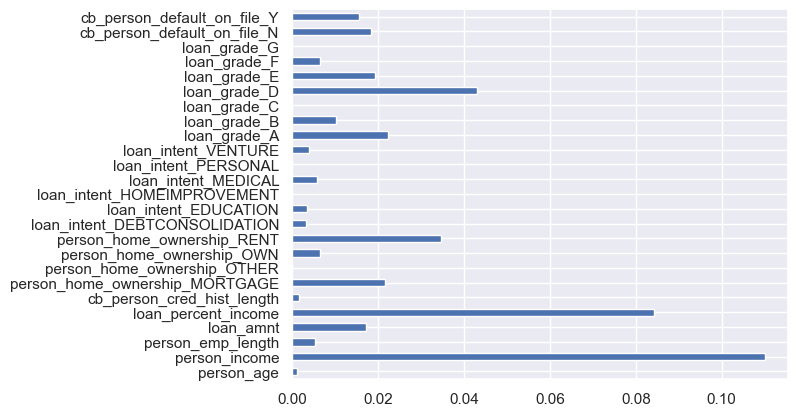

In [47]:
from sklearn.feature_selection import mutual_info_classif

mic_values = mutual_info_classif(df_fs.drop(columns='loan_status'), df_fs['loan_status'])
my_series = pd.Series(mic_values, index=df_fs.columns.drop('loan_status'))
my_series.plot(kind='barh')

In [48]:
dff = df.drop(columns=['cb_person_cred_hist_length', 'person_emp_length'])

# <div style="border-radius:0px; border:#0047AB solid; padding: 15px; background-color: lightblue; font-size:100%; text-align:center">7. Creating Best Pipeline</div>

## Train test split

In [49]:
dff

person_age  person_income person_home_ownership      loan_intent  \
1              21           9600                   OWN        EDUCATION   
2              25           9600              MORTGAGE          MEDICAL   
3              23          65500                  RENT          MEDICAL   
4              24          54400                  RENT          MEDICAL   
5              21           9900                   OWN          VENTURE   
...           ...            ...                   ...              ...   
32576          57          53000              MORTGAGE         PERSONAL   
32577          54         120000              MORTGAGE         PERSONAL   
32578          65          76000                  RENT  HOMEIMPROVEMENT   
32579          56         150000              MORTGAGE         PERSONAL   
32580          66          42000                  RENT          MEDICAL   

      loan_grade  loan_amnt  loan_status  loan_percent_income  \
1              B       1000            0                 0.10   
2              C       5500            1                 0.57   
3              C      35000            1                 0.53   
4              C      35000            1                 0.55   
5              A       2500            1                 0.25   
...          ...        ...          ...                  ...   
32576          C       5800            0                 0.11   
32577          A      17625            0                 0.15   
32578          B      35000            1                 0.46   
32579          B      15000            0                 0.10   
32580          B       6475            0                 0.15   

      cb_person_default_on_file  
1                             N  
2                             N  
3                             N  
4                             Y  
5                             N  
...                         ...  
32576                         N  
32577                         N  
32578                         N  
32579                         N  
32580                         N  

[28494 rows x 9 columns]

In [50]:
X = dff.drop(columns='loan_status')
y = dff['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
X

person_age  person_income person_home_ownership      loan_intent  \
1              21           9600                   OWN        EDUCATION   
2              25           9600              MORTGAGE          MEDICAL   
3              23          65500                  RENT          MEDICAL   
4              24          54400                  RENT          MEDICAL   
5              21           9900                   OWN          VENTURE   
...           ...            ...                   ...              ...   
32576          57          53000              MORTGAGE         PERSONAL   
32577          54         120000              MORTGAGE         PERSONAL   
32578          65          76000                  RENT  HOMEIMPROVEMENT   
32579          56         150000              MORTGAGE         PERSONAL   
32580          66          42000                  RENT          MEDICAL   

      loan_grade  loan_amnt  loan_percent_income cb_person_default_on_file  
1              B       1000                 0.10                         N  
2              C       5500                 0.57                         N  
3              C      35000                 0.53                         N  
4              C      35000                 0.55                         Y  
5              A       2500                 0.25                         N  
...          ...        ...                  ...                       ...  
32576          C       5800                 0.11                         N  
32577          A      17625                 0.15                         N  
32578          B      35000                 0.46                         N  
32579          B      15000                 0.10                         N  
32580          B       6475                 0.15                         N  

[28494 rows x 8 columns]

#### - The Main Pipeline will be made of **two** parts:

- Preprocessing for **NUMERICAL VARIABLES**:

1. **Scaling** - To maintain the scale among features

- Preprocessing for **CATEGORICAL VARIABLES**:

1. **One Hot Encoder** - To encode each categoric for model interpretability


In [52]:
### 1. Creating a pipeline for numerical columns:
num_pipe = Pipeline([
    ('scale', StandardScaler()),
])

### 2. Using the Column Transformer class for binding the above numeric pipeline and the preprocessing steps of categorical columns:
### Here, for keeping a list of numeric and categorical columns, I have used the make_column_selector method. You can read more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_selector.html

ct = ColumnTransformer([
    ('num_pipe', num_pipe, make_column_selector(dtype_include=np.number)),
#     ('cat_cols', OneHotEncoder(drop='first', handle_unknown='ignore'), make_column_selector(dtype_include=object))
    ('cat_cols',
     OrdinalEncoder(categories=[['RENT', 'MORTGAGE', 'OWN', 'OTHER'],
                                ['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'DEBTCONSOLIDATION', 'HOMEIMPROVEMENT'], 
                                ['A', 'B', 'C', 'D', 'E', 'F', 'G'], 
                                ['N', 'Y']]),
    ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
    ),
], remainder='passthrough')

ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_pipe',
                                 Pipeline(steps=[('scale', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000019F00917910>),
                                ('cat_cols',
                                 OrdinalEncoder(categories=[['RENT', 'MORTGAGE',
                                                             'OWN', 'OTHER'],
                                                            ['EDUCATION',
                                                             'MEDICAL',
                                                             'VENTURE',
                                                             'PERSONAL',
                                                             'DEBTCONSOLIDATION',
                                                             'HOMEIMPROVEMENT'],
                                                            ['A', 'B', 'C', 'D',
                                                             'E', 'F', 'G'],
                                                            ['N', 'Y']]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [53]:
X_new_train = ct.fit_transform(X_train)
X_new_test = ct.fit_transform(X_test)

### Try Several Models

In [54]:
lgr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
# svc = SVC()

In [55]:
clf = {
    'lgr' : lgr,
    'knn' : knn,
    'dt': dt,
    'rf': rf,
#     'svc': svc,
}

In [56]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix

def train_classifier(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Calculate confusion matrix to get TN and FP for specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    return accuracy, precision, recall, specificity


In [57]:
accuracy_scores = []
precision_scores = []
recall_scores = []
specificity_scores = []

for name,clf in clf.items():
    
#     current_accuracy,current_precision, current_recall, current_specificity = train_classifier(clf, X_train, X_test, y_train, y_test)
    current_accuracy,current_precision, current_recall, current_specificity = train_classifier(clf, X_new_train, X_new_test, y_train, y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("Specificity - ",current_specificity)
    print()
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    specificity_scores.append(current_specificity)
    

For  lgr
Accuracy -  0.8536670955667329
Precision -  0.7374798061389337
Recall -  0.4964654703643284
Specificity -  0.9515648286140089

For  knn
Accuracy -  0.8951924201661013
Precision -  0.8394528437724982
Recall -  0.6340402392604676
Specificity -  0.9667660208643816

For  dt
Accuracy -  0.8637267516668616
Precision -  0.6640701071080818
Recall -  0.7417074497009244
Specificity -  0.8971684053651267

For  rf
Accuracy -  0.9114516317697976
Precision -  0.854521625163827
Recall -  0.7090810222947254
Specificity -  0.9669150521609537



In [59]:
# List of dictionaries containing metrics for each model
metrics_data = [
    {'Model': 'Logistic Regression', 'Accuracy': accuracy_scores[0], 'Precision': precision_scores[0], 'Recall': recall_scores[0], 'Specificity': specificity_scores[0]},
    {'Model': 'K-nearest Negibors', 'Accuracy': accuracy_scores[1], 'Precision': precision_scores[1], 'Recall': recall_scores[1], 'Specificity': specificity_scores[1]},
    {'Model': 'Decision Tree', 'Accuracy': accuracy_scores[2], 'Precision': precision_scores[2], 'Recall': recall_scores[2], 'Specificity': specificity_scores[2]},
    {'Model': 'randome Forest', 'Accuracy': accuracy_scores[3], 'Precision': precision_scores[3], 'Recall': recall_scores[3], 'Specificity': specificity_scores[3]},
#     {'Model': 'SVC', 'Accuracy': accuracy_scores[4], 'Precision': precision_scores[4], 'Recall': recall_scores[4], 'Specificity': specificity_scores[4]},
]

# Create a DataFrame directly from the list of dictionaries
df = pd.DataFrame(metrics_data)

df


Model  Accuracy  Precision    Recall  Specificity
0  Logistic Regression  0.853667   0.737480  0.496465     0.951565
1   K-nearest Negibors  0.895192   0.839453  0.634040     0.966766
2        Decision Tree  0.863727   0.664070  0.741707     0.897168
3       randome Forest  0.911452   0.854522  0.709081     0.966915

# <div style="border-radius:0px; border:#0047AB solid; padding: 15px; background-color: lightblue; font-size:100%; text-align:center">8. Final Model</div>

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('scaler', ct),  # Feature scaling
#     ('classifier', DecisionTreeClassifier())  # Decision Tree Classifier
#     ('classifier_logistic', LogisticRegression()) # Logistic Regression classifier
#     ('classifier_svc', SVC())
#     ('classifier_knn', KNeighborsClassifier())
    ('classifier_randomforest', RandomForestClassifier())
])


In [65]:
pipeline

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000019F00917910>),
                                                 ('cat_cols',
                                                  OrdinalEncoder(categories=[['RENT',
                                                                              'MORTGAGE',
                                                                              'OWN',
                                                                              'OTHER'],
                                                                             ['EDUCATION',
                                                                              'MEDICAL',
                                                                              'VENTURE',
                                                                              'PERSONAL',
                                                                              'DEBTCONSOLIDATION',
                                                                              'HOMEIMPROVEMENT'],
                                                                             ['A',
                                                                              'B',
                                                                              'C',
                                                                              'D',
                                                                              'E',
                                                                              'F',
                                                                              'G'],
                                                                             ['N',
                                                                              'Y']]),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file'])])),
                ('classifier_randomforest', RandomForestClassifier())])

## Hyper parameter tuning:

In [66]:
# Define the hyperparameters grid for Random forest Classifier
param_grid = {
    'classifier_randomforest__criterion': ['gini', 'entropy'],
    'classifier_randomforest__max_depth': [3, 5, 7, 10],  # Maximum depth of the tree
    'classifier_randomforest__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'classifier_randomforest__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

grid_search_cv = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_pipe',
                                                                         Pipeline(steps=[('scale',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000019F00917910>),
                                                                        ('cat_cols',
                                                                         OrdinalEncoder(categories=[['RENT',
                                                                                                     'MORTGAGE',
                                                                                                     'OWN',
                                                                                                     'OTHER'],
                                                                                                    ['EDUCATION',
                                                                                                     'MEDICAL',
                                                                                                     '...
                                                                         ['person_home_ownership',
                                                                          'loan_intent',
                                                                          'loan_grade',
                                                                          'cb_person_default_on_file'])])),
                                       ('classifier_randomforest',
                                        RandomForestClassifier())]),
             param_grid={'classifier_randomforest__criterion': ['gini',
                                                                'entropy'],
                         'classifier_randomforest__max_depth': [3, 5, 7, 10],
                         'classifier_randomforest__min_samples_leaf': [1, 2, 4],
                         'classifier_randomforest__min_samples_split': [2, 5,
                                                                        10]},
             verbose=1)

In [72]:
print(grid_search_cv.best_params_)
accuracy_score(y_test, grid_search_cv.predict(X_test))

{'classifier_randomforest__criterion': 'entropy', 'classifier_randomforest__max_depth': 10, 'classifier_randomforest__min_samples_leaf': 1, 'classifier_randomforest__min_samples_split': 2}


0.9202245876710726

In [68]:
# Save the ML Pipeline:
import joblib
joblib.dump(grid_search_cv, 'best_pipeline.pkl')

['best_pipeline.pkl']

In [69]:
X_new_test.shape

(8549, 8)

[]

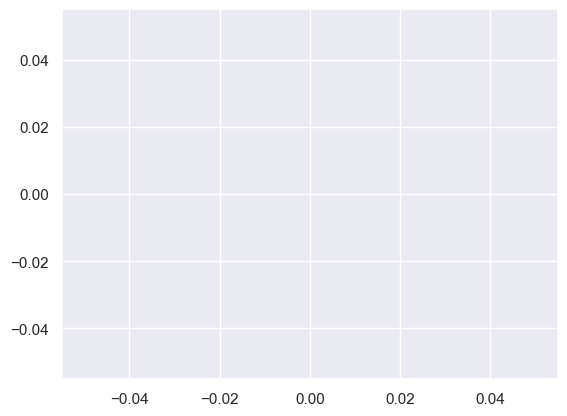

In [70]:
# plt.plot()